<a href="https://colab.research.google.com/github/asir928/IDS/blob/main/HW4/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Asir Nayeef

# **Project 4 - Problem 2 (Python)**

1. Importing the data

In [1]:
# import pandas
import pandas as pd

# convert to dataframe
nutrition_subset = pd.read_csv("nutrition_subset.csv")

# summarize the dataframe
nutrition_subset.describe()


,weight_in_grams,saturated_fat,cholesterol
count,961.000000,961.000000,961.00000
mean,149.409365,3.987617,32.55359
std,175.909357,10.744359,119.96059
min,0.400000,0.000000,0.00000
25%,32.000000,0.000000,0.00000
50%,113.000000,0.400000,0.00000
75%,218.000000,3.300000,20.00000
max,1542.000000,119.900000,2053.00000


In [2]:
# print first 10 rows
nutrition_subset.head(10)

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
5,PARMESAN CHEESE; GRATED 1 TBSP,5.00,1.0,4
6,YEAST; BREWERS; DRY 1 TBSP,8.00,0.0,0
7,LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,48.00,2.9,59
8,TUNA; CANND; DRND;WATR; WHITE 3 OZ,85.00,0.3,48
9,NONFAT DRY MILK; INSTANTIZED 1 CUP,68.00,0.3,12


2. Sort by saturated fat.


In [4]:
nutrition_subset.sort_values(by=['saturated_fat'], ascending=False).iloc[0:5, 0:6]

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


I disagree with the validity of comparing foods of different sizes because people usually eat a smaller portion (serving size).

3. Making a new variable saturated_fat_per_gram by dividing fat by weight

In [7]:
# make new column
nutrition_subset['saturated_fat_per_gram'] = nutrition_subset['saturated_fat'] / nutrition_subset['weight_in_grams']
# sort the values
nutrition_subset.sort_values(by=['saturated_fat_per_gram'], ascending=False).iloc[0:5, 0:6]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


Butter (salted 1 tbsp) has the most saturated fat per gram.

4. Standardizing saturated_fat_per_gram and finding outliers.

count    9.610000e+02
mean     6.654406e-17
std      1.000521e+00
min     -5.623352e-01
25%     -5.623352e-01
50%     -4.412993e-01
75%      1.539996e-01
max      7.110475e+00
Name: scaled_saturated_fat_per_gram, dtype: float64
There are 15 outliers.
210    4.240676
448    3.938687
492    4.204266
576    3.942889
709    7.082741
710    7.082741
890    5.371375
898    3.278227
899    5.373078
907    3.223726
908    7.110475
909    7.110475
912    7.002408
913    7.002408
920    4.732985
Name: scaled_saturated_fat_per_gram, dtype: float64


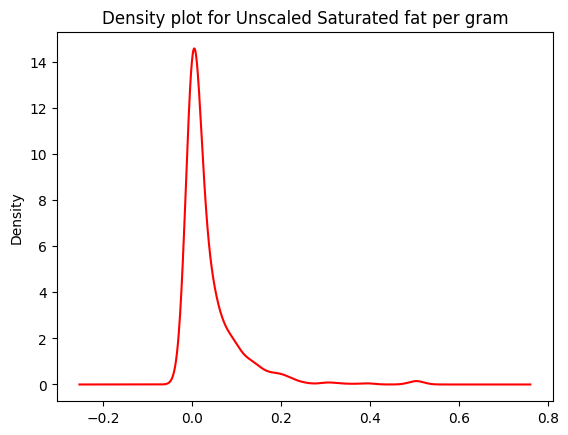

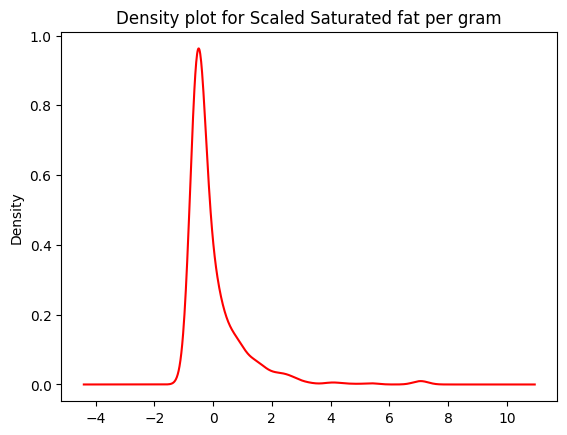

<Axes: >

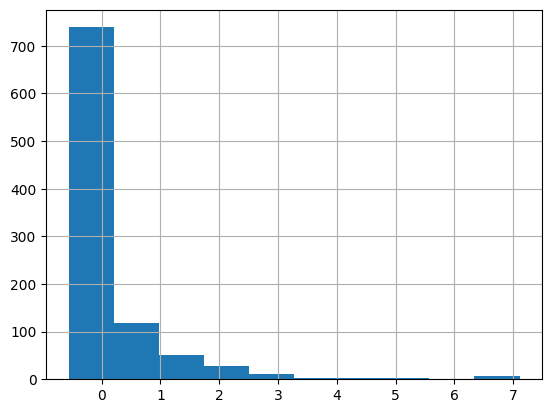

In [17]:
# import necessities
from scipy import stats
import matplotlib.pyplot as plt

# standardize
nutrition_subset['scaled_saturated_fat_per_gram'] = stats.zscore(nutrition_subset.saturated_fat_per_gram, nan_policy='omit')
# summarize
print(nutrition_subset['scaled_saturated_fat_per_gram'].describe())
# query outliers
fat_outliers = nutrition_subset.query('(scaled_saturated_fat_per_gram > 3 | scaled_saturated_fat_per_gram < -3)')['scaled_saturated_fat_per_gram']

# print outliers
print("There are", len(fat_outliers), "outliers.")
print(fat_outliers)

nutrition_subset.sort_values(by=['scaled_saturated_fat_per_gram'], ascending=False).iloc[0:len(fat_outliers), 0:6]

nutrition_subset.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated fat per gram')
plt.show()

nutrition_subset.scaled_saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Scaled Saturated fat per gram')
plt.show()

nutrition_subset['scaled_saturated_fat_per_gram'].hist()

5. Checking for missing values and imputing if necessary

In [15]:
print(nutrition_subset.weight_in_grams.isnull().sum())
print(nutrition_subset.saturated_fat.isnull().sum())
print(nutrition_subset.cholesterol.isnull().sum())
print(nutrition_subset.saturated_fat_per_gram.isnull().sum())
print(nutrition_subset.scaled_saturated_fat_per_gram.isnull().sum())

0
0
0
0
0


There are no missing values.

6. Standardizing other numeric varables and finding their outliers

count    9.610000e+02
mean     6.654406e-17
std      1.000521e+00
min     -8.475215e-01
25%     -6.677899e-01
50%     -2.070858e-01
75%      3.901234e-01
max      7.920646e+00
Name: scaled_weight, dtype: float64
There are 22 outliers.
361    4.326016
376    6.891171
378    5.463557
386    3.842561
406    3.569551
410    5.446494
422    7.886520
423    5.452182
430    4.326016
433    5.110919
445    5.634188
452    3.927876
458    5.452182
466    5.201923
479    5.383929
535    5.907198
539    4.525086
545    4.525086
556    4.525086
579    4.525086
581    4.326016
696    7.920646
Name: scaled_weight, dtype: float64


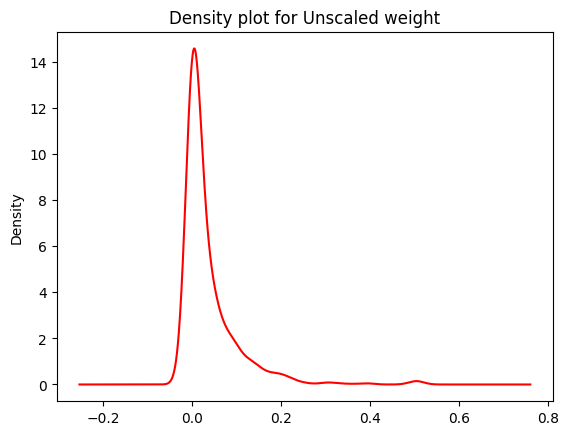

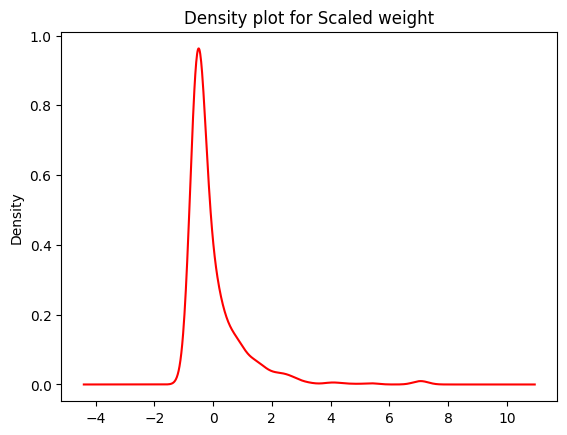

<Axes: >

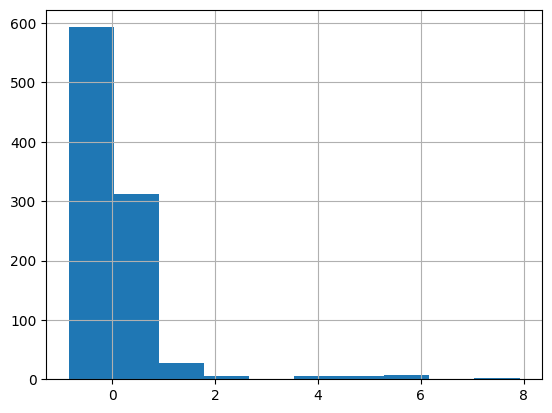

In [18]:
# standardize
nutrition_subset['scaled_weight'] = stats.zscore(nutrition_subset.weight_in_grams, nan_policy='omit')
# summarize
print(nutrition_subset['scaled_weight'].describe())
# query outliers
weight_outliers = nutrition_subset.query('(scaled_weight > 3 | scaled_weight < -3)')['scaled_weight']

# print outliers
print("There are", len(weight_outliers), "outliers.")
print(weight_outliers)

nutrition_subset.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled weight')
plt.show()

nutrition_subset.scaled_saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Scaled weight')
plt.show()

nutrition_subset['scaled_weight'].hist()

count    961.000000
mean       0.000000
std        1.000521
min       -0.371329
25%       -0.371329
50%       -0.334081
75%       -0.064031
max       10.793826
Name: scaled_fat, dtype: float64
There are 20 outliers.
376     4.061209
378    10.793826
384     4.470940
410     4.806174
422     5.774628
423     4.079833
430     3.185876
458     8.195762
466     6.268167
479     3.502486
535    10.644833
581     8.018833
587     4.731677
588     3.930841
709     4.945855
710     4.945855
890     7.115564
901     3.027571
905     3.278997
907     4.405755
Name: scaled_fat, dtype: float64


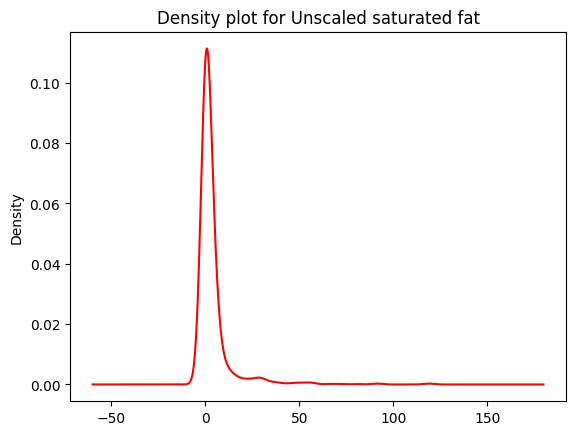

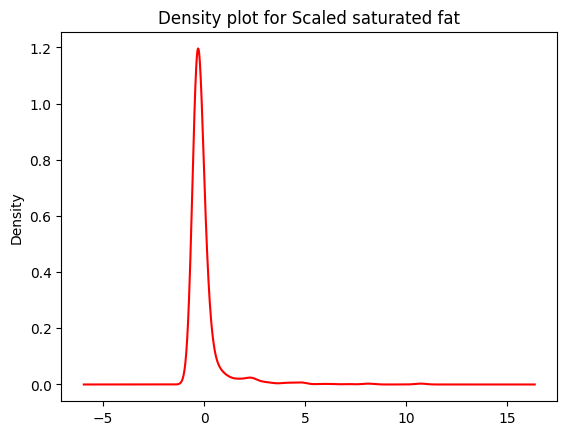

<Axes: >

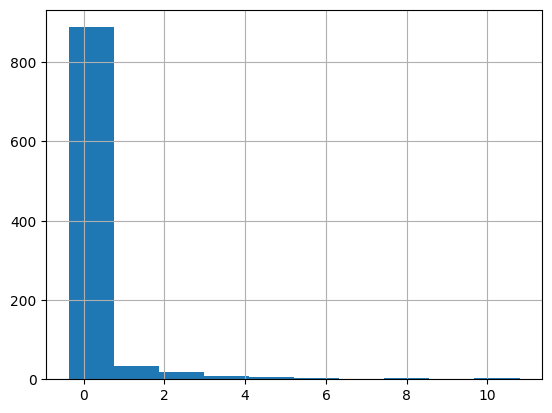

In [19]:
# standardize
nutrition_subset['scaled_fat'] = stats.zscore(nutrition_subset.saturated_fat, nan_policy='omit')
# summarize
print(nutrition_subset['scaled_fat'].describe())
# query outliers
satfat_outliers = nutrition_subset.query('(scaled_fat > 3 | scaled_fat < -3)')['scaled_fat']

# print outliers
print("There are", len(satfat_outliers), "outliers.")
print(satfat_outliers)

nutrition_subset.saturated_fat.plot.density(color="red")
plt.title('Density plot for Unscaled saturated fat')
plt.show()

nutrition_subset.scaled_fat.plot.density(color="red")
plt.title('Density plot for Scaled saturated fat')
plt.show()

nutrition_subset['scaled_fat'].hist()

count    9.610000e+02
mean    -2.957514e-17
std      1.000521e+00
min     -2.715103e-01
25%     -2.715103e-01
50%     -2.715103e-01
75%     -1.047021e-01
max      1.685135e+01
Name: scaled_cholesterol, dtype: float64
There are 17 outliers.
45      3.148058
351     4.357418
361     8.152305
376     5.066353
378    16.851355
384     8.902942
386     4.474184
406     4.332397
410     4.716056
422     9.595197
423     4.532567
430     5.191459
452     6.876222
458     4.807800
466     3.698526
479     5.032991
535     5.591799
Name: scaled_cholesterol, dtype: float64


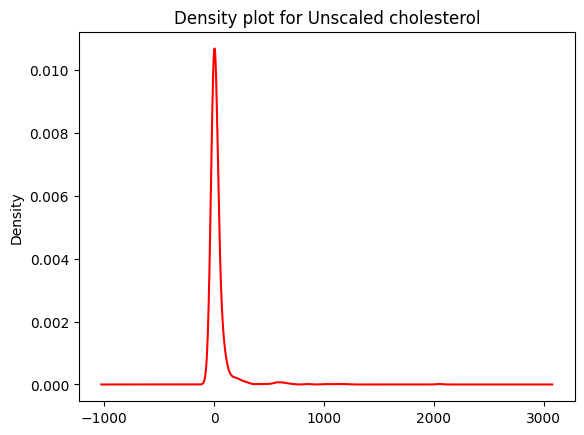

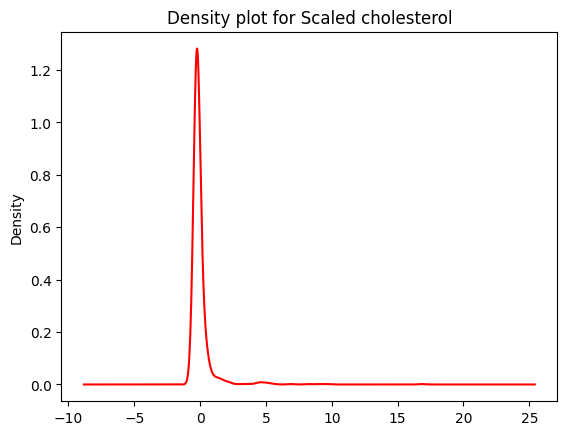

<Axes: >

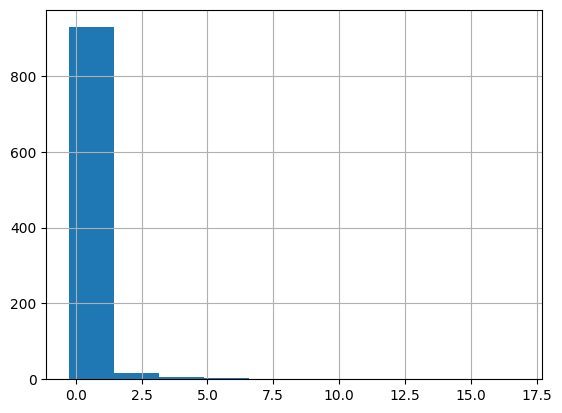

In [21]:
# standardize
nutrition_subset['scaled_cholesterol'] = stats.zscore(nutrition_subset.cholesterol, nan_policy='omit')
# summarize
print(nutrition_subset['scaled_cholesterol'].describe())
# query outliers
cholesterol_outliers = nutrition_subset.query('(scaled_cholesterol > 3 | scaled_cholesterol < -3)')['scaled_cholesterol']

# print outliers
print("There are", len(cholesterol_outliers), "outliers.")
print(cholesterol_outliers)

nutrition_subset.cholesterol.plot.density(color="red")
plt.title('Density plot for Unscaled cholesterol')
plt.show()

nutrition_subset.scaled_cholesterol.plot.density(color="red")
plt.title('Density plot for Scaled cholesterol')
plt.show()

nutrition_subset['scaled_cholesterol'].hist()

8. Summarize

* None of the fields have missing values in them.
* All 4 numeric fields have outliers on the high-end